In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
df_company = pd.read_csv("company_cleaned_df.csv")

In [3]:
pd.set_option("display.max_column", None)
df_company

status_acquired  status_closed  status_ipo  status_operating  \
0                  0.0            0.0         0.0               1.0   
1                  0.0            0.0         0.0               1.0   
2                  0.0            0.0         0.0               1.0   
3                  1.0            0.0         0.0               0.0   
4                  0.0            0.0         0.0               1.0   
...                ...            ...         ...               ...   
57653              0.0            0.0         0.0               1.0   
57654              0.0            0.0         0.0               1.0   
57655              0.0            0.0         0.0               1.0   
57656              0.0            0.0         0.0               1.0   
57657              0.0            0.0         0.0               1.0   

       founded_at  active_days  first_funding_at  last_funding_at  \
0            2007         5114            2010.0           2011.0   
1            2008         4749            2010.0           2011.0   
2            2008         4749            2010.0           2011.0   
3            2007         2192            2008.0           2008.0   
4            2008         4749            2010.0           2011.0   
...           ...          ...               ...              ...   
57653        2007         5114            2010.0           2011.0   
57654        2007         5114            2008.0           2008.0   
57655        1959        22646            2010.0           2011.0   
57656        2008         4749            2010.0           2011.0   
57657        2007         5114            2008.0           2008.0   

       funding_rounds  funding_total_usd  first_milestone_at  \
0                 1.0          4587548.0              2009.0   
1                 1.0          4587548.0              2009.0   
2                 1.0          4587548.0              2008.0   
3                 1.0          5000000.0              2008.0   
4                 1.0          4587548.0              2008.0   
...               ...                ...                 ...   
57653             1.0          4587548.0              2013.0   
57654             1.0           750000.0              2013.0   
57655             1.0          4587548.0              2012.0   
57656             1.0          4587548.0              2009.0   
57657             1.0           475000.0              2006.0   

       last_milestone_at  milestones  relationships        lat         lng  \
0                 2010.0         1.0            2.0  30.427755   -9.598107   
1                 2010.0         1.0            4.0  22.307159   73.181219   
2                 2008.0         1.0            2.0  35.686975 -105.937799   
3                 2012.0         3.0           14.0  37.386052 -122.083851   
4                 2008.0         1.0            3.0  33.078655 -116.601964   
...                  ...         ...            ...        ...         ...   
57653             2013.0         2.0            5.0  37.774929 -122.419415   
57654             2013.0         1.0           14.0  37.338208 -121.886329   
57655             2013.0         3.0           44.0  38.882334  -77.171091   
57656             2010.0         1.0            1.0  34.052234 -118.243685   
57657             2008.0         2.0            1.0  34.035633 -118.515590   

       category_code_advertising  category_code_biotech  \
0                            1.0                    0.0   
1                            0.0                    0.0   
2                            1.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   
...                          ...                    ...   
57653                        0.0                    0.0   
57654                        0.0                    0.0   
57655                        0.0                    0.0   
57656                        

In [4]:
# Checking the amount of null values
df_company.isna().sum()

status_acquired                   0
status_closed                     0
status_ipo                        0
status_operating                  0
founded_at                        0
active_days                       0
first_funding_at                  0
last_funding_at                   0
funding_rounds                    0
funding_total_usd                 0
first_milestone_at                0
last_milestone_at                 0
milestones                        0
relationships                     0
lat                               0
lng                               0
category_code_advertising         0
category_code_biotech             0
category_code_consulting          0
category_code_ecommerce           0
category_code_enterprise          0
category_code_games_video         0
category_code_mobile              0
category_code_other               0
category_code_public_relations    0
category_code_software            0
category_code_web                 0
country_code_AUS            

In [5]:
df_company.dtypes

status_acquired                   float64
status_closed                     float64
status_ipo                        float64
status_operating                  float64
founded_at                          int64
active_days                         int64
first_funding_at                  float64
last_funding_at                   float64
funding_rounds                    float64
funding_total_usd                 float64
first_milestone_at                float64
last_milestone_at                 float64
milestones                        float64
relationships                     float64
lat                               float64
lng                               float64
category_code_advertising         float64
category_code_biotech             float64
category_code_consulting          float64
category_code_ecommerce           float64
category_code_enterprise          float64
category_code_games_video         float64
category_code_mobile              float64
category_code_other               

In [6]:
target_feat = ["status_acquired","status_closed","status_ipo","status_operating"]
num_feat = ["founded_at","active_days","first_funding_at","last_funding_at","funding_rounds","funding_total_usd","first_milestone_at","last_milestone_at","milestones","relationships","lat","lng"]
cat_feat = {"category_code": ["category_code_advertising","category_code_biotech","category_code_consulting","category_code_ecommerce","category_code_enterprise","category_code_games_video","category_code_mobile","category_code_other","category_code_public_relations","category_code_software","category_code_web"],
           "country_code": ["country_code_AUS","country_code_CAN","country_code_DEU","country_code_ESP","country_code_FRA","country_code_GBR","country_code_IND","country_code_ISR","country_code_NLD","country_code_USA","country_code_other"],
           "isClosed": ["isClosed"]}

# Exploratory Data Analysis

##    1) Univariate Analysis
           a) Numerical features
               -Summary Statistics
               -Visualisation
           b) Categorical features
               - Analyzing the frequency distribution using visualisation tools

##    2) Bivariate Analysis
           a) Numerical-Numerical relationships
               -Pairplot
               -Correlation analysis

#### 1) a) Univariate analysis/Numerical features

In [7]:
# Displaying some statistics
df_company[num_feat].describe()

founded_at   active_days  first_funding_at  last_funding_at  \
count  57658.000000  57658.000000      57658.000000     57658.000000   
mean    2005.456155   5389.037289       2010.089892      2010.950224   
std        9.866370   3650.825357          1.541923         1.451669   
min     1901.000000 -14610.000000       1960.000000      1960.000000   
25%     2004.000000   3653.000000       2010.000000      2011.000000   
50%     2008.000000   4383.000000       2010.000000      2011.000000   
75%     2011.000000   5844.000000       2010.000000      2011.000000   
max     2014.000000  43830.000000       2013.000000      2013.000000   

       funding_rounds  funding_total_usd  first_milestone_at  \
count    57658.000000       5.765800e+04        57658.000000   
mean         1.140050       4.587548e+06         2009.267717   
std          0.428613       3.360142e+06            3.038786   
min          1.000000       2.910000e+02         1960.000000   
25%          1.000000       4.587548e+06         2009.000000   
50%          1.000000       4.587548e+06         2009.000000   
75%          1.000000       4.587548e+06         2011.000000   
max          3.000000       2.922000e+07         2014.000000   

       last_milestone_at    milestones  relationships           lat  \
count       57658.000000  57658.000000   57658.000000  57658.000000   
mean         2010.037913      1.195133       3.935308     37.206975   
std             2.932626      0.521584      11.468022     16.113390   
min          1960.000000      1.000000       1.000000    -50.942326   
25%          2010.000000      1.000000       2.000000     34.019454   
50%          2010.000000      1.000000       3.000000     39.768403   
75%          2011.000000      1.000000       4.000000     45.476545   
max          2014.000000      7.000000    1189.000000     77.553604   

                lng  
count  57658.000000  
mean     -49.009021  
std       71.130693  
min     -159.485278  
25%     -111.658534  
50%      -75.165222  
75%        2.352222  
max      176.165130

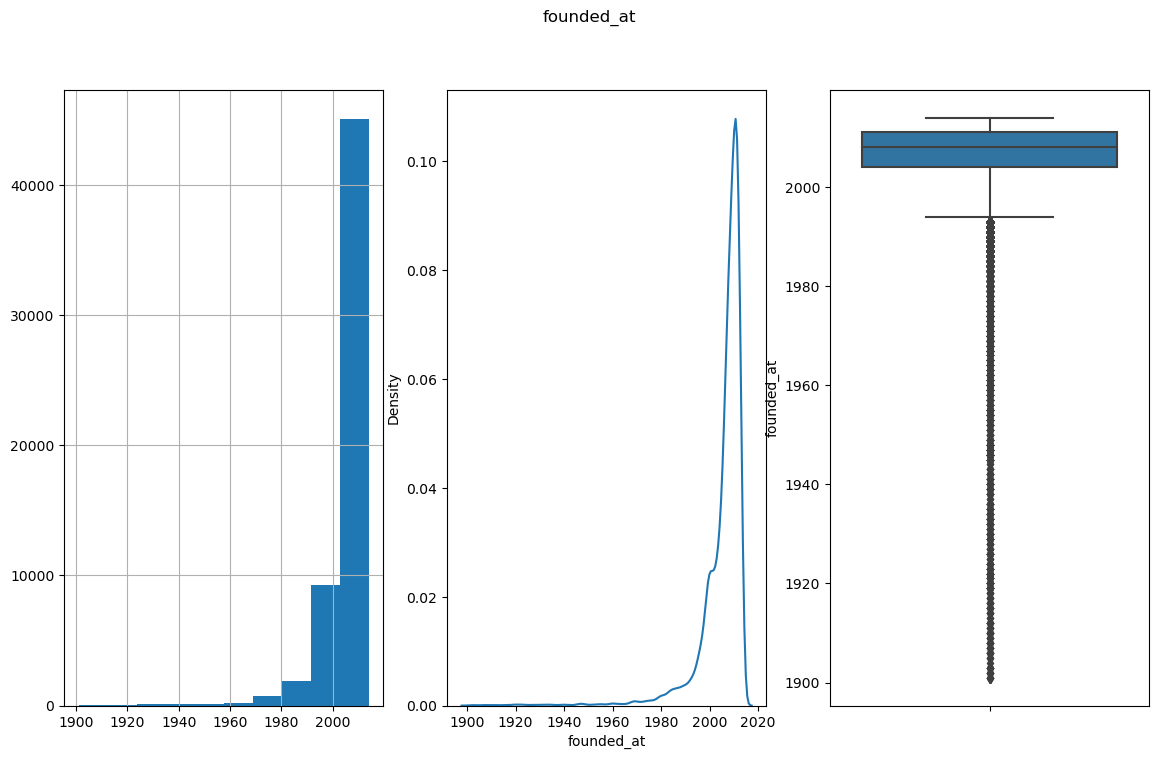

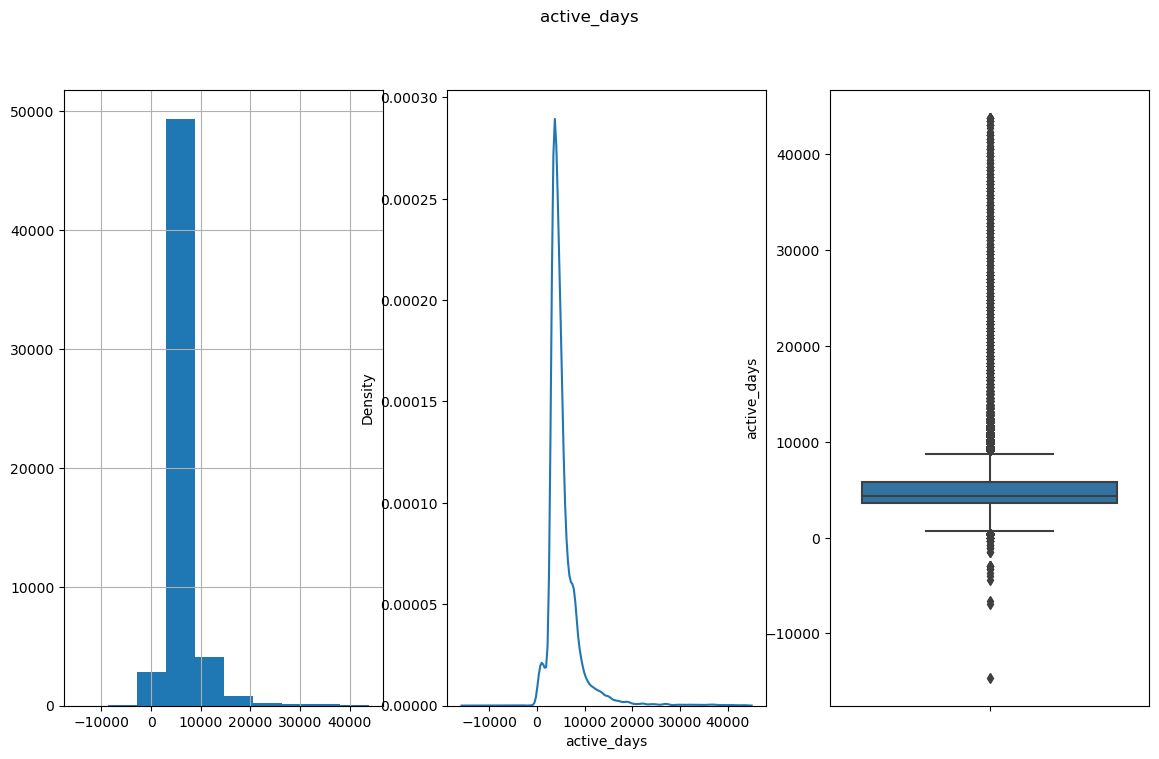

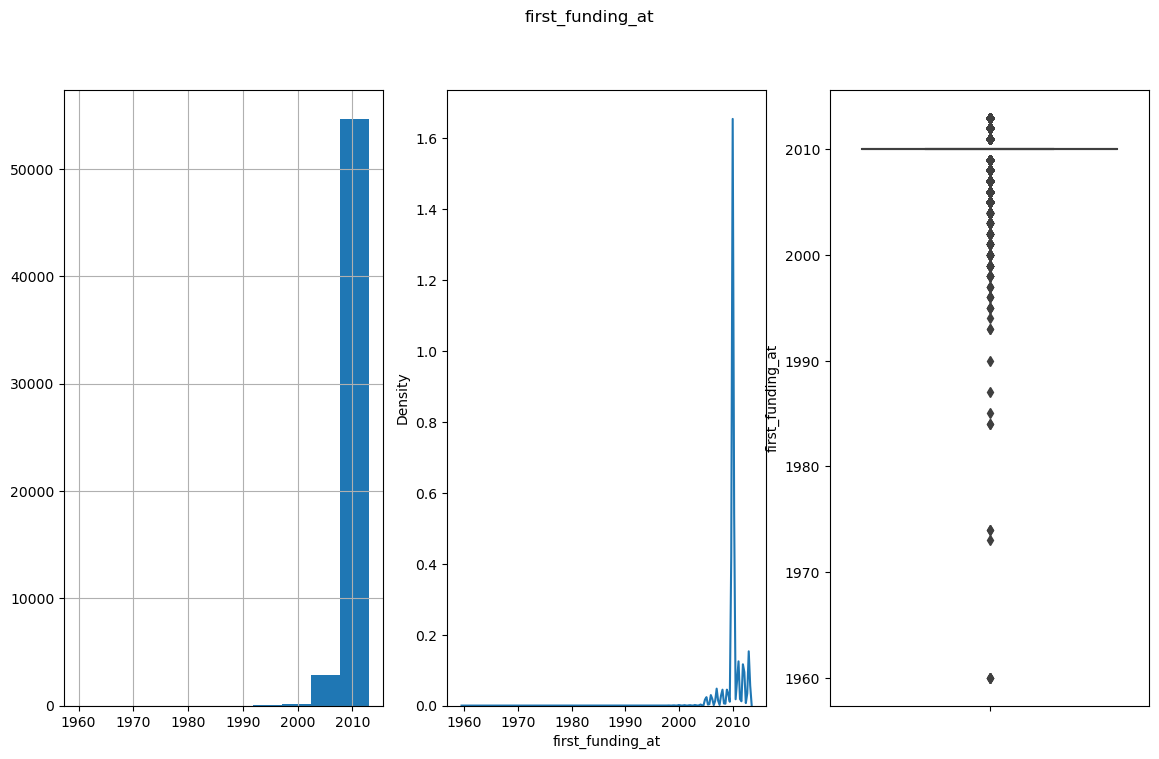

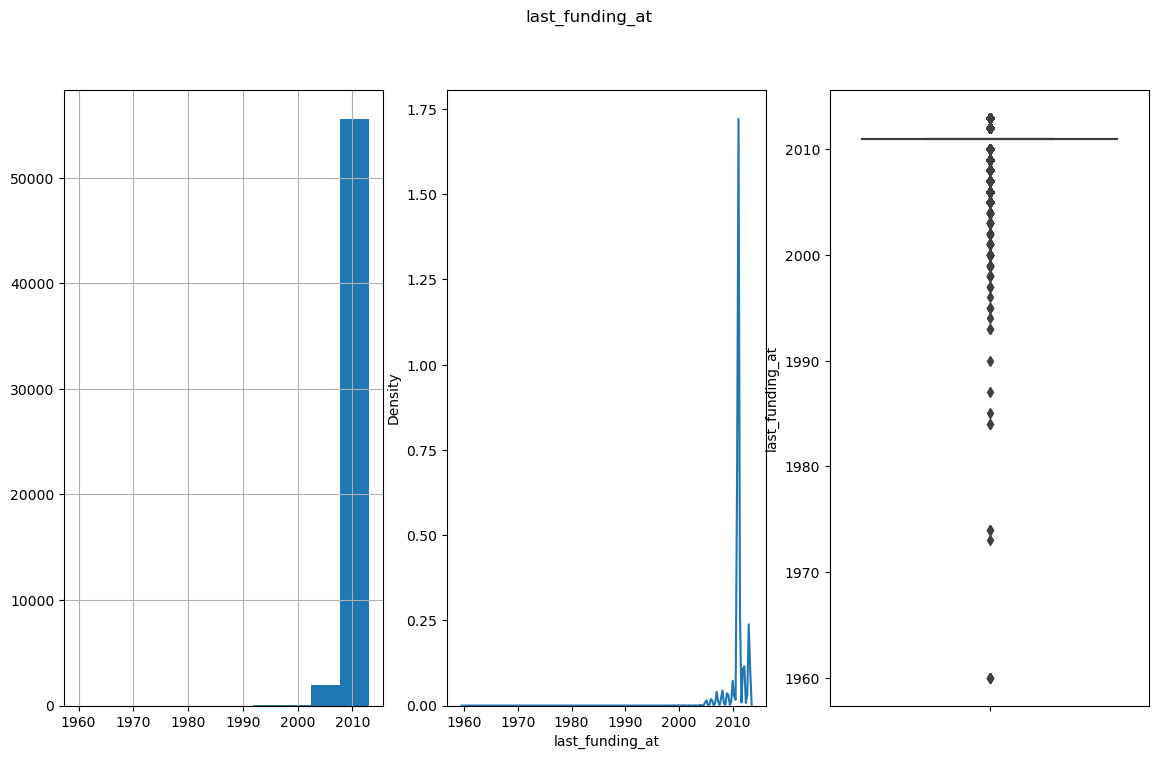

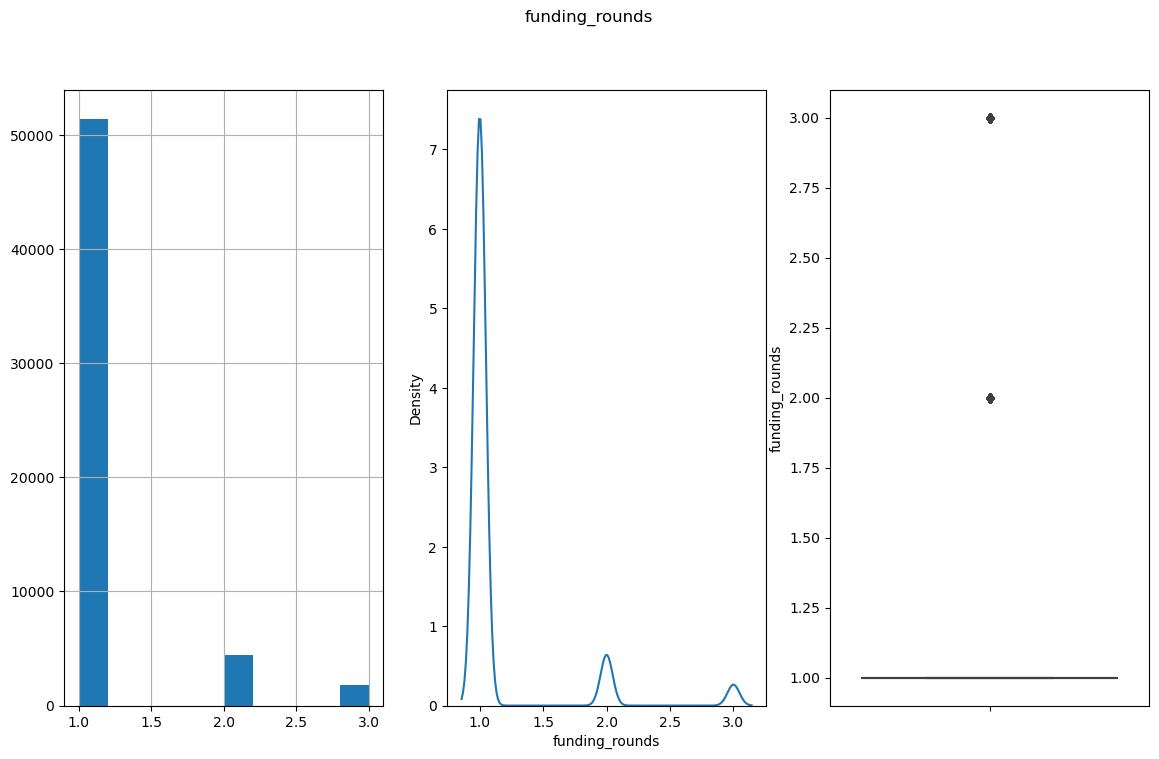

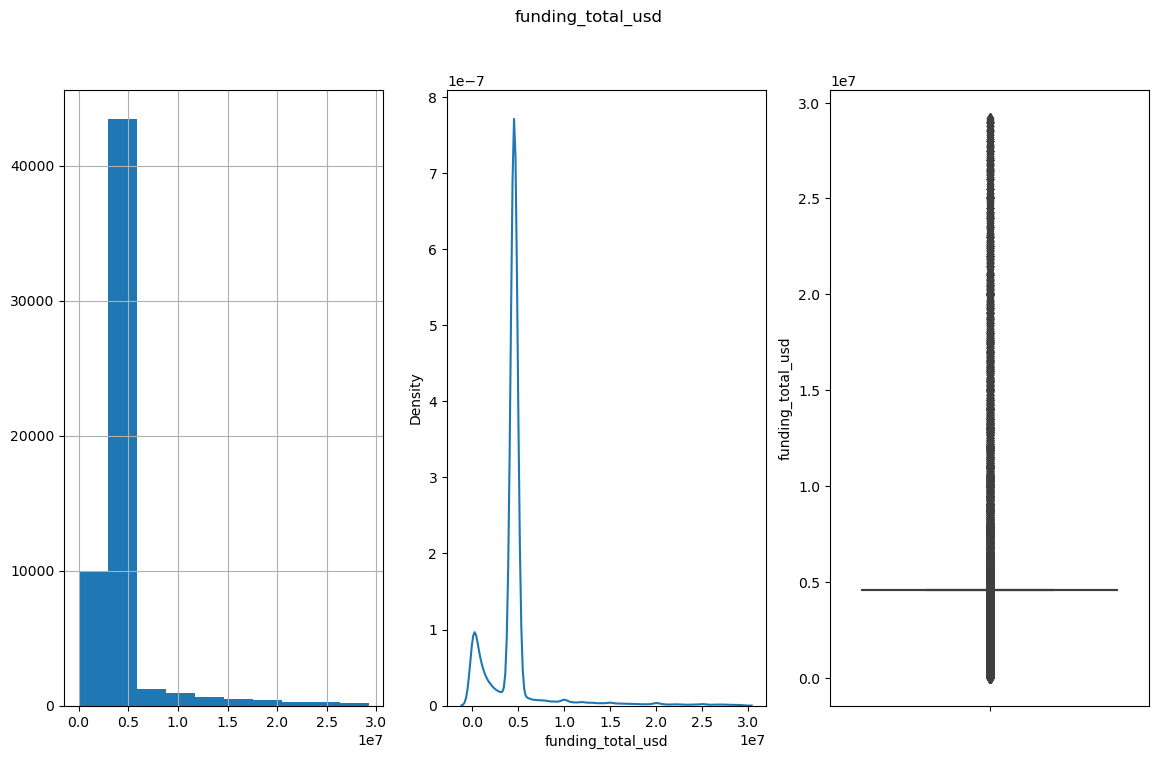

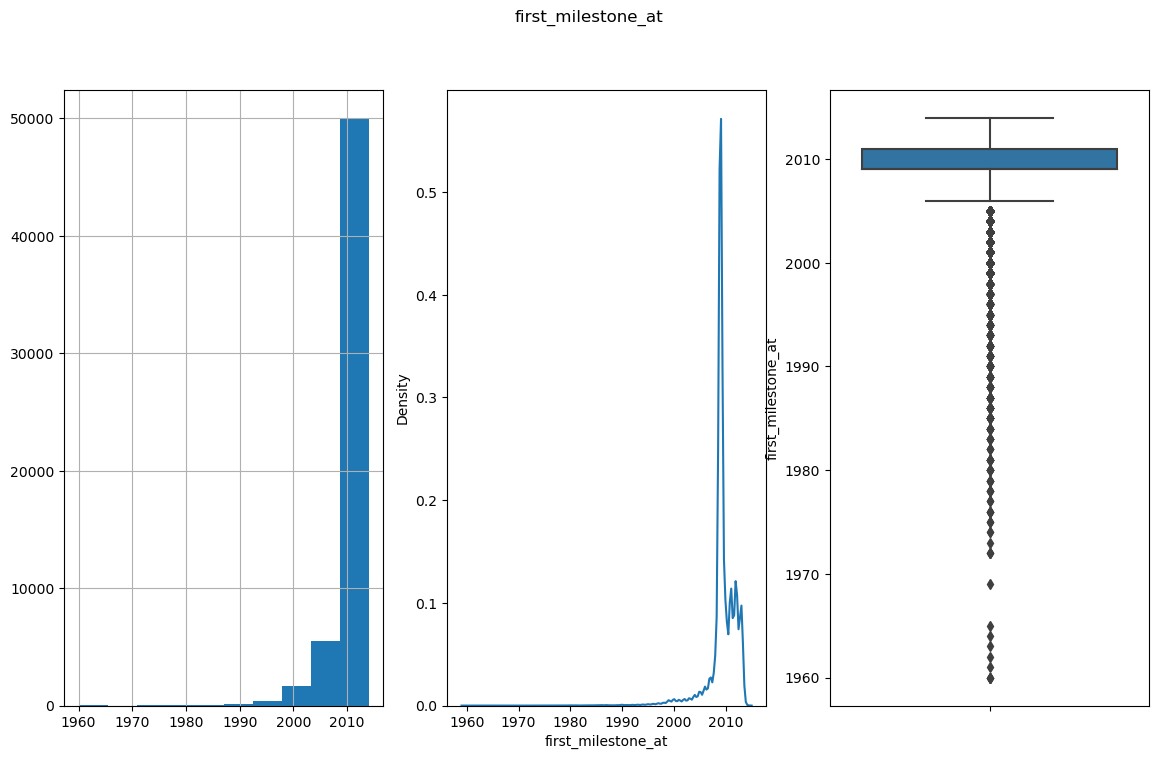

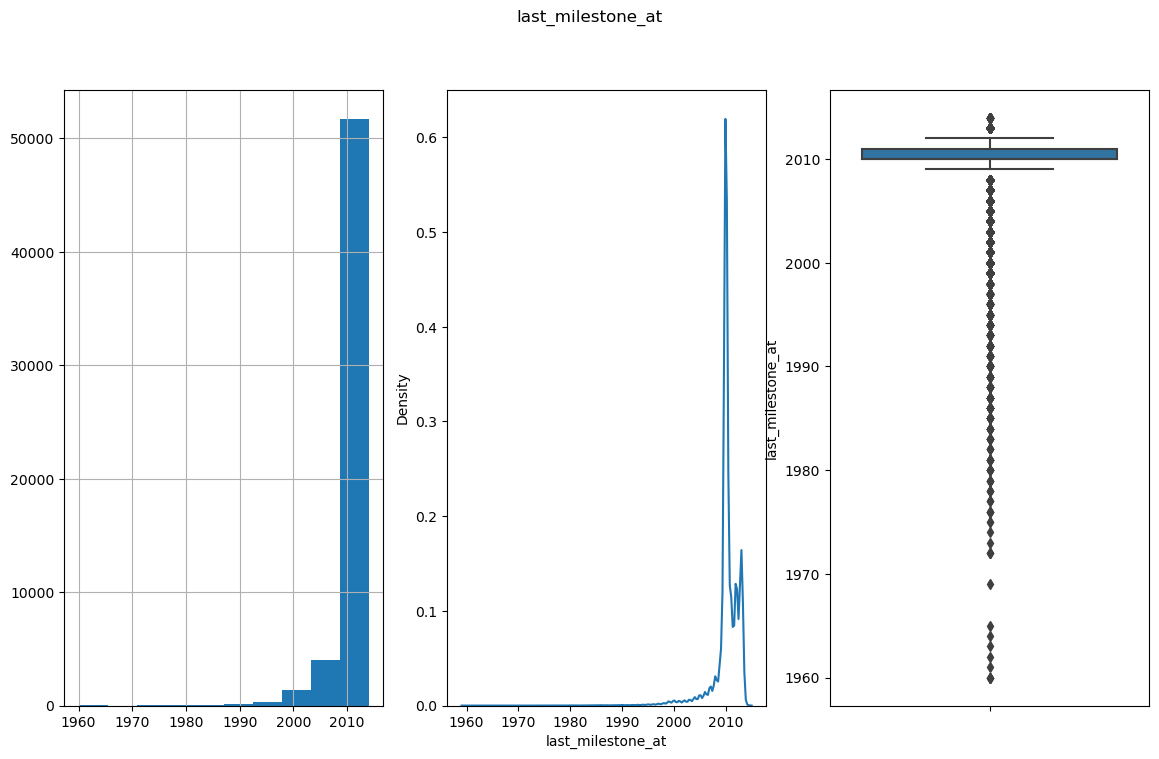

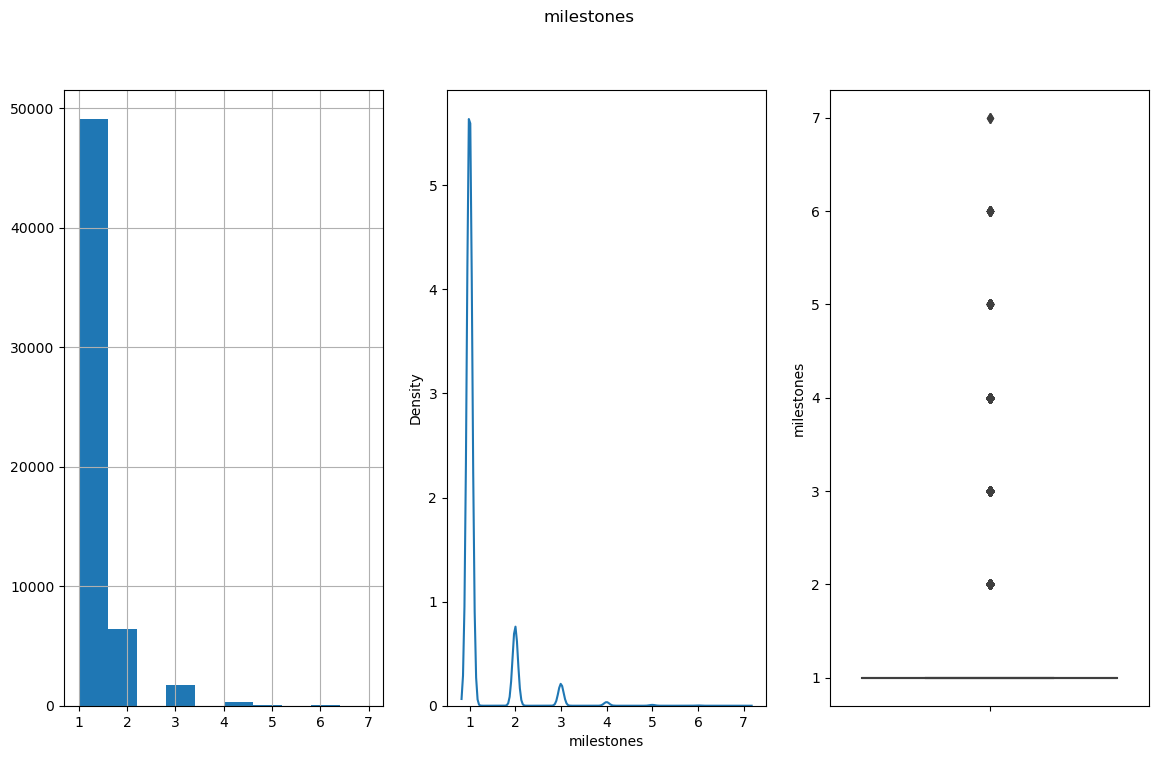

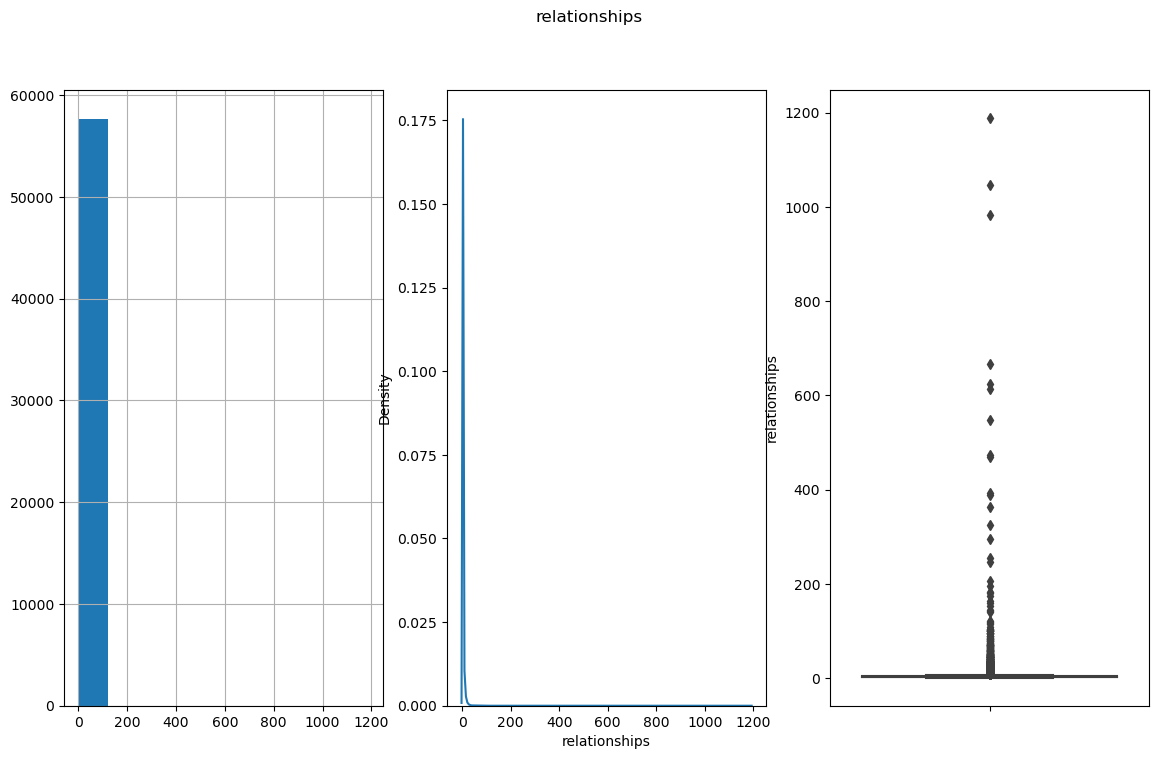

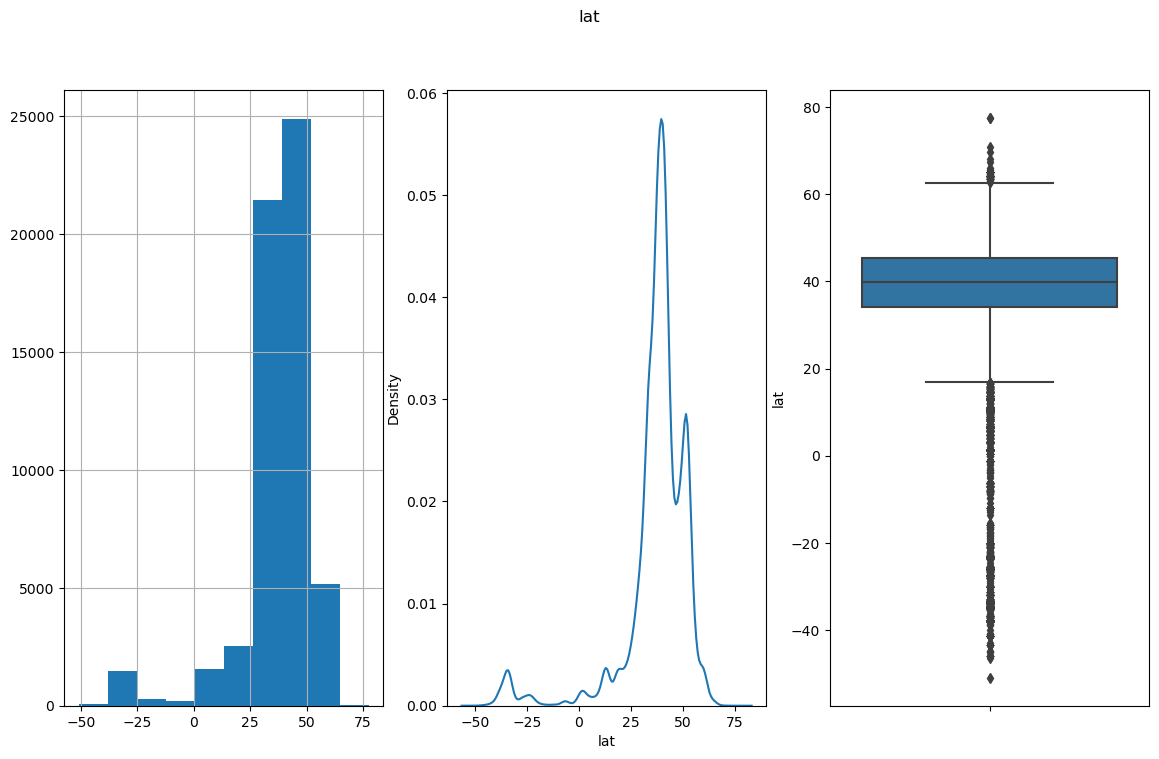

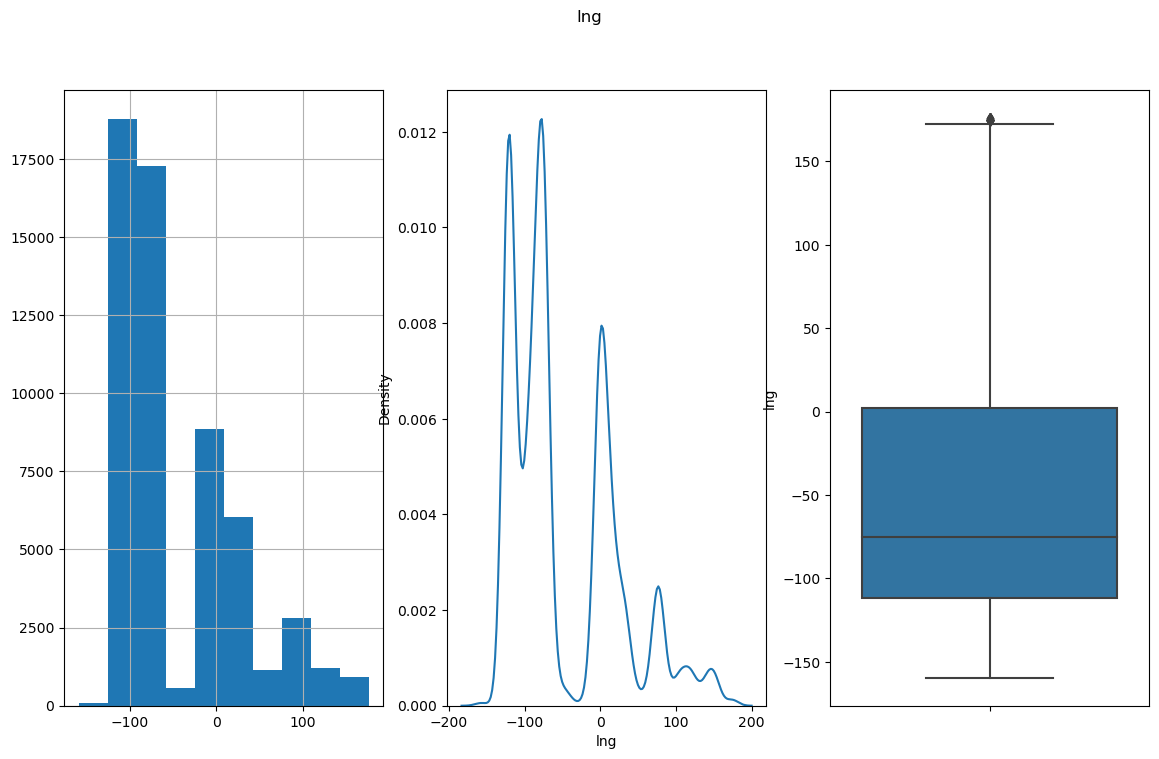

In [8]:
# Displaying histogram, kernel density plot and boxplot for each numerical feature

for col in num_feat:
    plt.figure(figsize = (14,8))
    plt.suptitle(col)
    plt.subplot(1,3,1)
    df_company[col].hist()
    plt.subplot(1,3,2)
    sns.kdeplot(df_company[col])
    plt.subplot(1,3,3)
    sns.boxplot(y = col, data = df_company)

In [9]:
z_scores = pd.DataFrame(stats.zscore(df_company[["founded_at","first_funding_at","last_funding_at","first_milestone_at","last_milestone_at","relationships","funding_total_usd","lat"]]),columns = ["founded_at","first_funding_at","last_funding_at","first_milestone_at","last_milestone_at","relationships","funding_total_usd","lat"])
abs(z_scores)

founded_at  first_funding_at  last_funding_at  first_milestone_at  \
0        0.156477          0.058299         0.034289            0.088101   
1        0.257832          0.058299         0.034289            0.088101   
2        0.257832          0.058299         0.034289            0.417182   
3        0.156477          1.355392         2.032315            0.417182   
4        0.257832          0.058299         0.034289            0.417182   
...           ...               ...              ...                 ...   
57653    0.156477          0.058299         0.034289            1.228226   
57654    0.156477          1.355392         2.032315            1.228226   
57655    4.708576          0.058299         0.034289            0.899144   
57656    0.257832          0.058299         0.034289            0.088101   
57657    0.156477          1.355392         2.032315            1.075345   

       last_milestone_at  relationships  funding_total_usd       lat  
0               0.012928       0.168758       2.309312e-08  0.420723  
1               0.012928       0.005641       2.309312e-08  0.924693  
2               0.694917       0.168758       2.309312e-08  0.094332  
3               0.669060       0.877639       1.227494e-01  0.011114  
4               0.694917       0.081559       2.309312e-08  0.256207  
...                  ...            ...                ...       ...  
57653           1.010055       0.092841       2.309312e-08  0.035248  
57654           1.010055       0.877639       1.142089e+00  0.008144  
57655           1.010055       3.493631       2.309312e-08  0.103974  
57656           0.012928       0.255958       2.309312e-08  0.195785  
57657           0.694917       0.255958       1.223932e+00  0.196816  

[57658 rows x 8 columns]

In [10]:
df_company[(abs(z_scores)>3).any(axis = 1)]

status_acquired  status_closed  status_ipo  status_operating  \
5                  1.0            0.0         0.0               0.0   
9                  0.0            0.0         0.0               1.0   
14                 0.0            0.0         0.0               1.0   
52                 0.0            0.0         0.0               1.0   
58                 0.0            0.0         0.0               1.0   
...                ...            ...         ...               ...   
57617              0.0            0.0         0.0               1.0   
57628              0.0            1.0         0.0               0.0   
57632              0.0            0.0         0.0               1.0   
57641              1.0            0.0         0.0               0.0   
57655              0.0            0.0         0.0               1.0   

       founded_at  active_days  first_funding_at  last_funding_at  \
5            2008         1827            2008.0           2008.0   
9            2003         6575            2003.0           2003.0   
14           2004         6210            2010.0           2011.0   
52           1978        15706            2010.0           2011.0   
58           1999         8036            2010.0           2011.0   
...           ...          ...               ...              ...   
57617        1998         8401            2006.0           2006.0   
57628        2002         3287            2006.0           2006.0   
57632        1952        25203            2010.0           2011.0   
57641        2003         2922            2006.0           2006.0   
57655        1959        22646            2010.0           2011.0   

       funding_rounds  funding_total_usd  first_milestone_at  \
5                 1.0          4587548.0              1995.0   
9                 1.0           250000.0              2007.0   
14                1.0          4587548.0              2004.0   
52                1.0          4587548.0              2000.0   
58                1.0          4587548.0              1999.0   
...               ...                ...                 ...   
57617             1.0          1200000.0              2009.0   
57628             1.0           400000.0              2009.0   
57632             1.0          4587548.0              2012.0   
57641             1.0         14500000.0              2006.0   
57655             1.0          4587548.0              2012.0   

       last_milestone_at  milestones  relationships        lat         lng  \
5                 2012.0         4.0            9.0  37.441883 -122.143019   
9                 2007.0         1.0            2.0 -27.469771  153.025124   
14                2004.0         1.0            1.0 -35.296256  139.038277   
52                2000.0         1.0            4.0  34.038078  -84.581572   
58                1999.0         1.0            3.0  31.808768  -85.969951   
...                  ...         ...            ...        ...         ...   
57617             2010.0         1.0            1.0 -36.854065  174.779879   
57628             2010.0         1.0            1.0  39.739236 -104.990251   
57632             2012.0         1.0           27.0  47.751074 -120.740139   
57641             2010.0         3.0           19.0  37.441883 -122.143019   
57655             2013.0         3.0           44.0  38.882334  -77.171091   

       category_code_advertising  category_code_biotech  \
5                            0.0                    0.0   
9                            0.0                    0.0   
14                           1.0                    0.0   
52                           0.0                    0.0   
58                           0.0                    0.0   
...                          ...                    ...   
57617                        0.0                    0.0   
57628                        0.0                    0.0   
57632                        0.0                    0.0   
57641                        

In [11]:
df_company = df_company[(abs(z_scores)<3).all(axis = 1)]

In [12]:
# Deleting negative values in active_days
df_company = df_company[df_company["active_days"]>0]

In [13]:
df_company

status_acquired  status_closed  status_ipo  status_operating  \
0                  0.0            0.0         0.0               1.0   
1                  0.0            0.0         0.0               1.0   
2                  0.0            0.0         0.0               1.0   
3                  1.0            0.0         0.0               0.0   
4                  0.0            0.0         0.0               1.0   
...                ...            ...         ...               ...   
57652              0.0            0.0         0.0               1.0   
57653              0.0            0.0         0.0               1.0   
57654              0.0            0.0         0.0               1.0   
57656              0.0            0.0         0.0               1.0   
57657              0.0            0.0         0.0               1.0   

       founded_at  active_days  first_funding_at  last_funding_at  \
0            2007         5114            2010.0           2011.0   
1            2008         4749            2010.0           2011.0   
2            2008         4749            2010.0           2011.0   
3            2007         2192            2008.0           2008.0   
4            2008         4749            2010.0           2011.0   
...           ...          ...               ...              ...   
57652        2004         6210            2010.0           2011.0   
57653        2007         5114            2010.0           2011.0   
57654        2007         5114            2008.0           2008.0   
57656        2008         4749            2010.0           2011.0   
57657        2007         5114            2008.0           2008.0   

       funding_rounds  funding_total_usd  first_milestone_at  \
0                 1.0          4587548.0              2009.0   
1                 1.0          4587548.0              2009.0   
2                 1.0          4587548.0              2008.0   
3                 1.0          5000000.0              2008.0   
4                 1.0          4587548.0              2008.0   
...               ...                ...                 ...   
57652             1.0          4587548.0              2009.0   
57653             1.0          4587548.0              2013.0   
57654             1.0           750000.0              2013.0   
57656             1.0          4587548.0              2009.0   
57657             1.0           475000.0              2006.0   

       last_milestone_at  milestones  relationships        lat         lng  \
0                 2010.0         1.0            2.0  30.427755   -9.598107   
1                 2010.0         1.0            4.0  22.307159   73.181219   
2                 2008.0         1.0            2.0  35.686975 -105.937799   
3                 2012.0         3.0           14.0  37.386052 -122.083851   
4                 2008.0         1.0            3.0  33.078655 -116.601964   
...                  ...         ...            ...        ...         ...   
57652             2010.0         1.0            4.0  40.748350  -74.323219   
57653             2013.0         2.0            5.0  37.774929 -122.419415   
57654             2013.0         1.0           14.0  37.338208 -121.886329   
57656             2010.0         1.0            1.0  34.052234 -118.243685   
57657             2008.0         2.0            1.0  34.035633 -118.515590   

       category_code_advertising  category_code_biotech  \
0                            1.0                    0.0   
1                            0.0                    0.0   
2                            1.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   
...                          ...                    ...   
57652                        0.0                    0.0   
57653                        0.0                    0.0   
57654                        0.0                    0.0   
57656                        

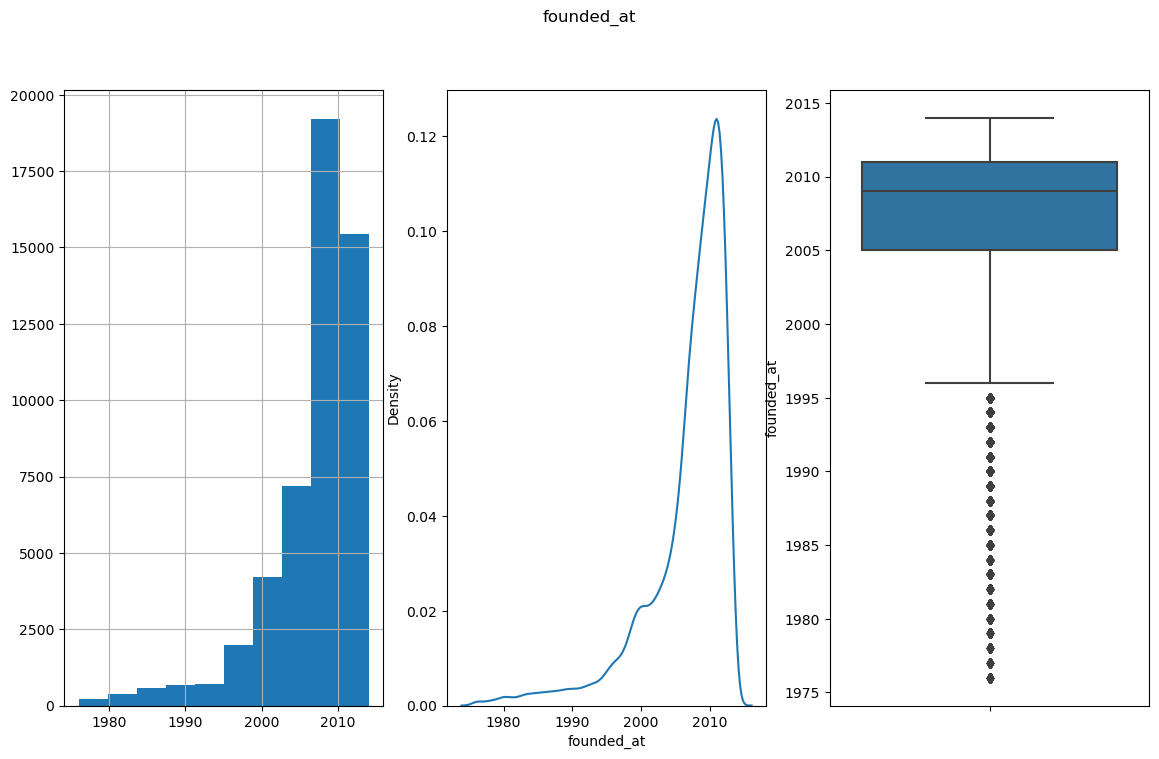

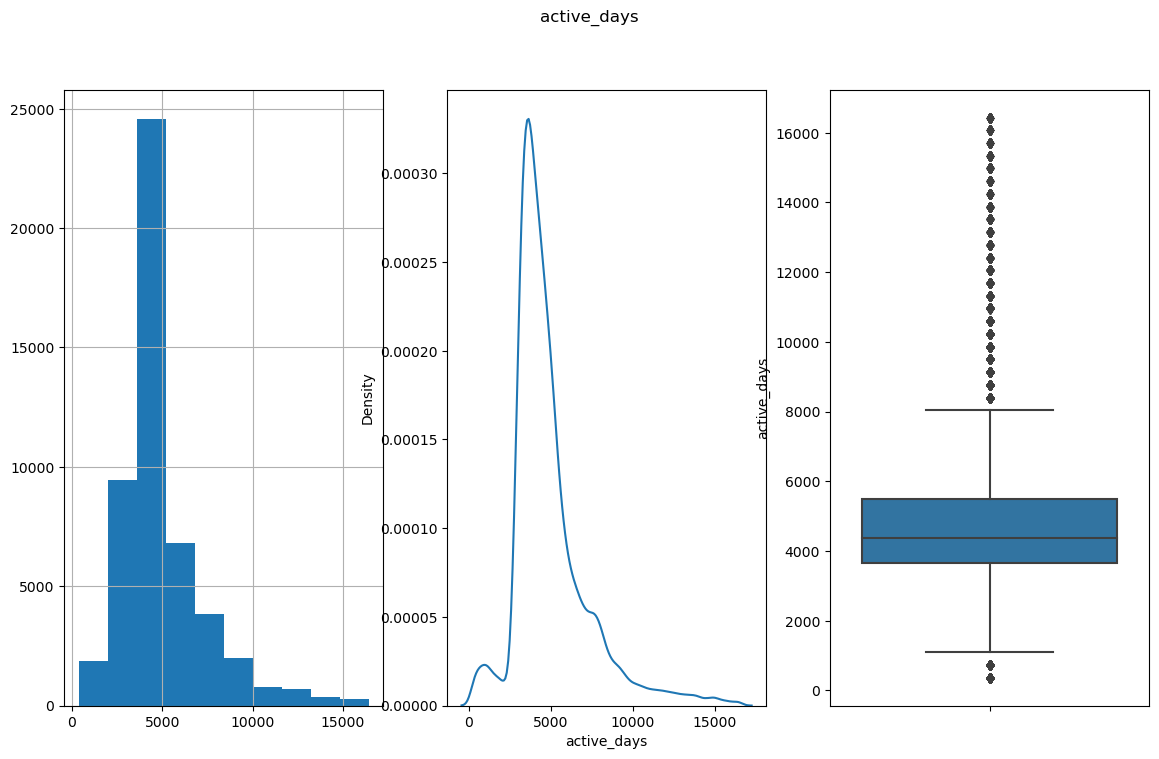

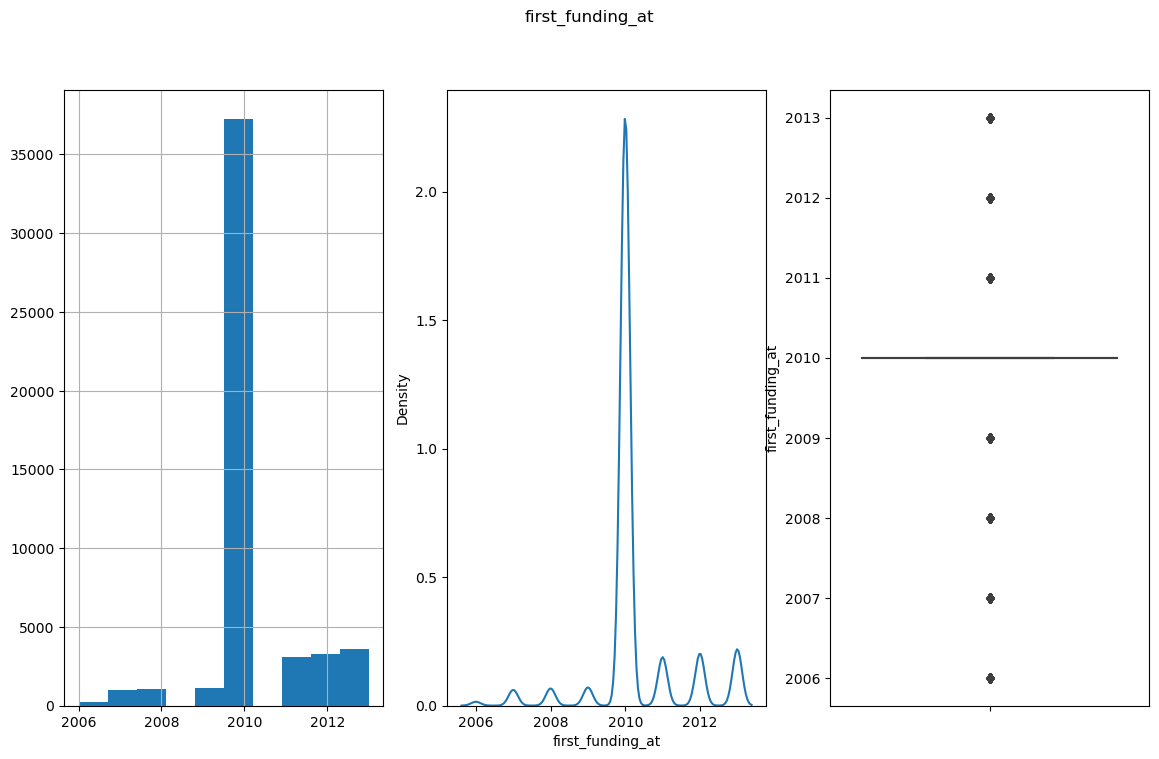

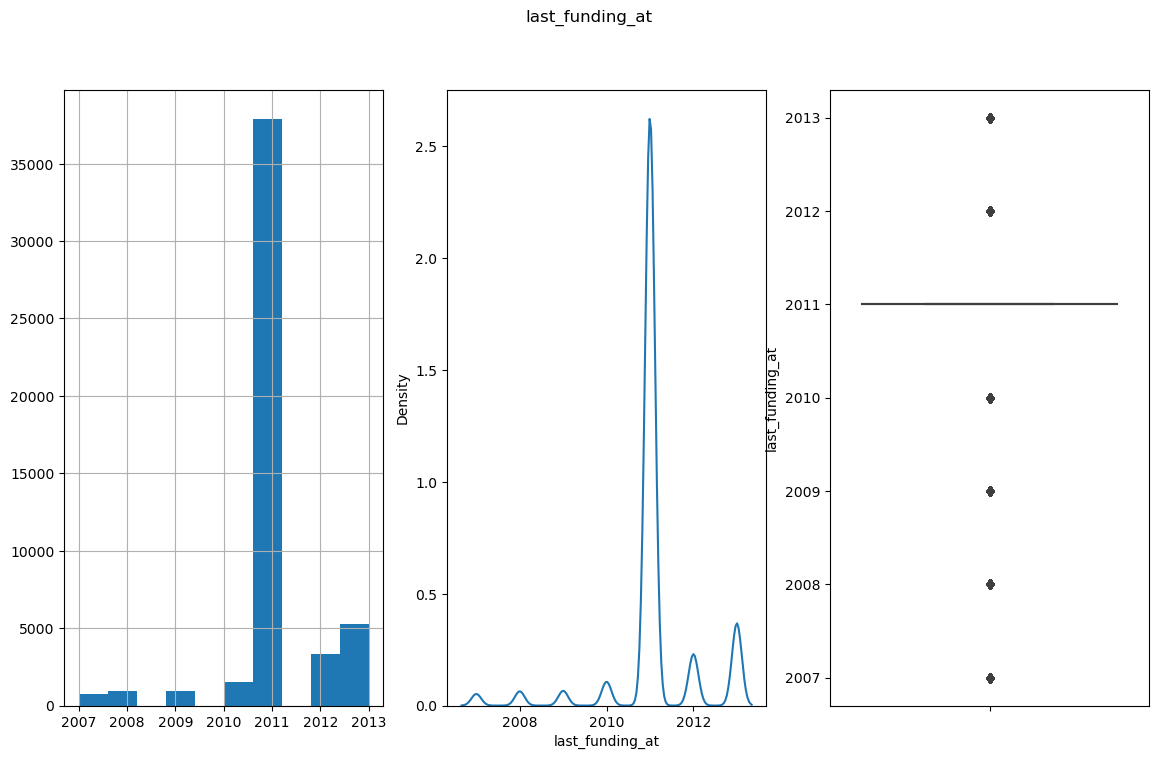

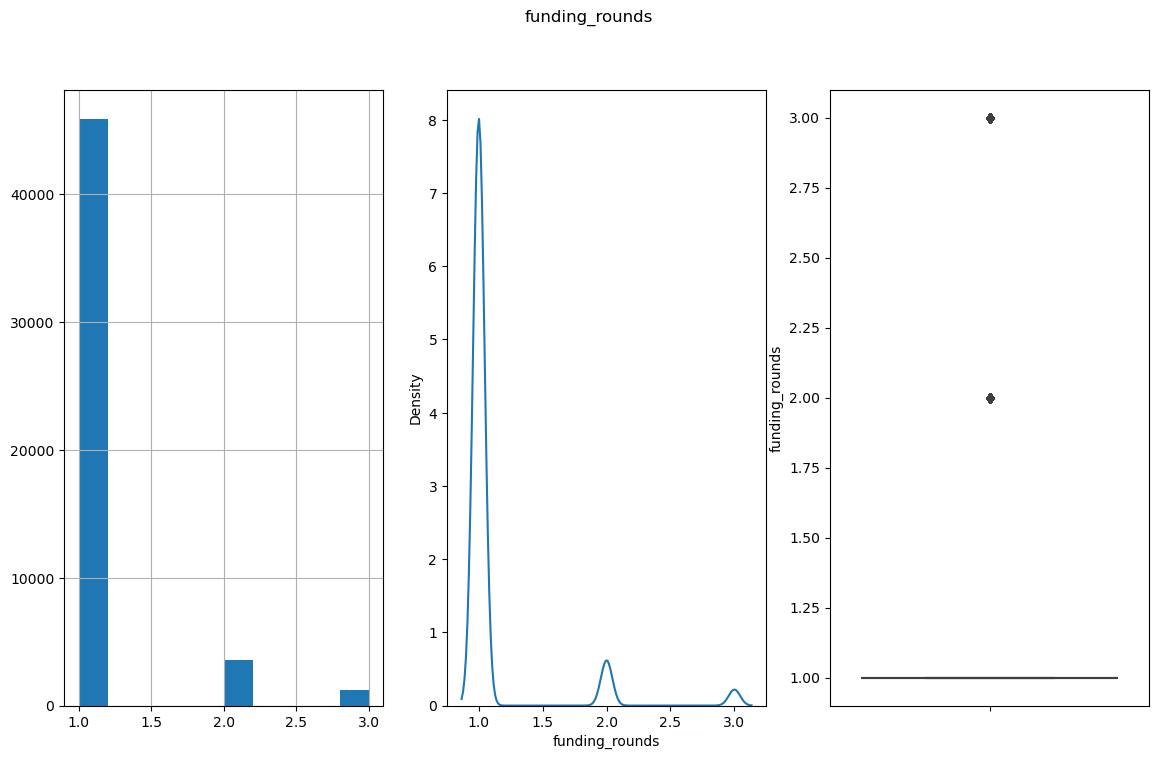

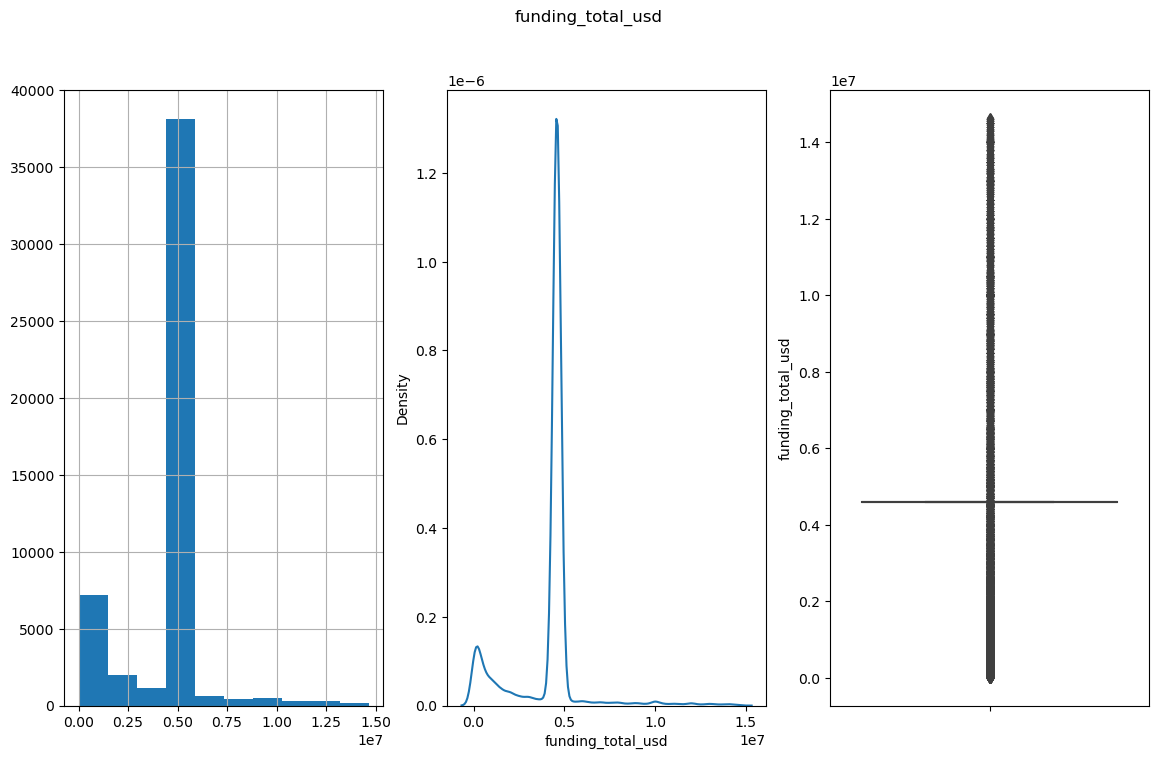

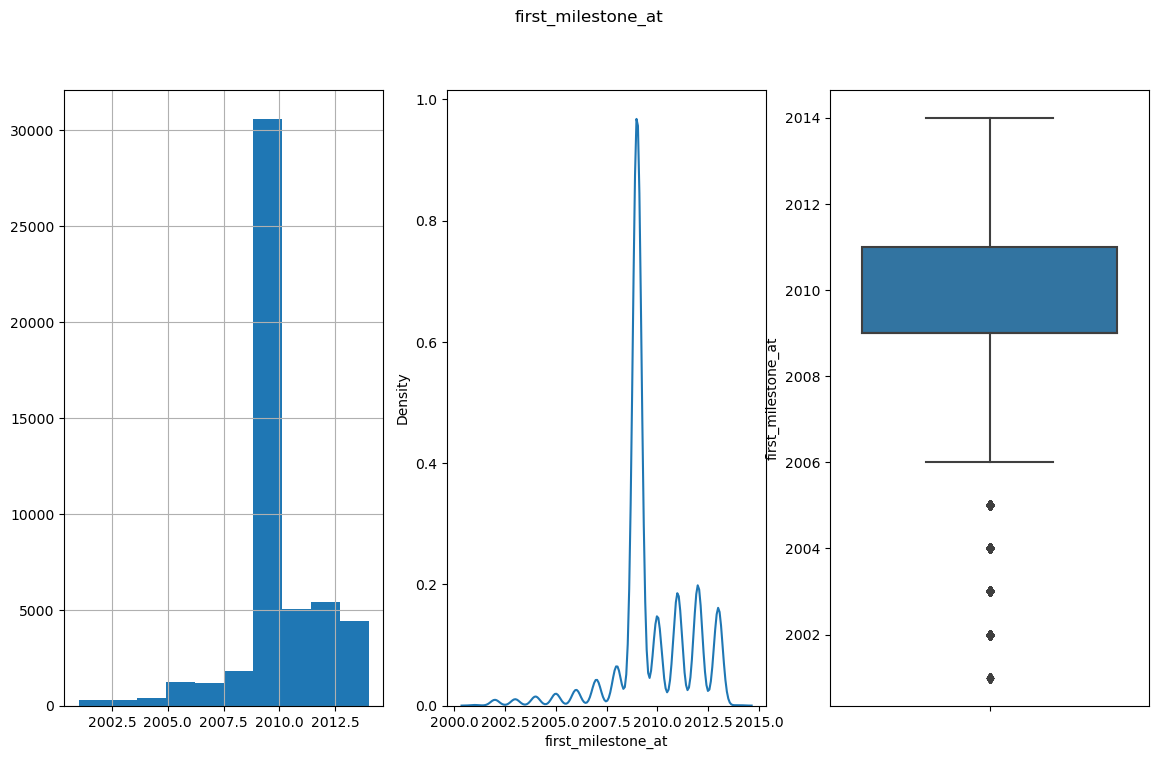

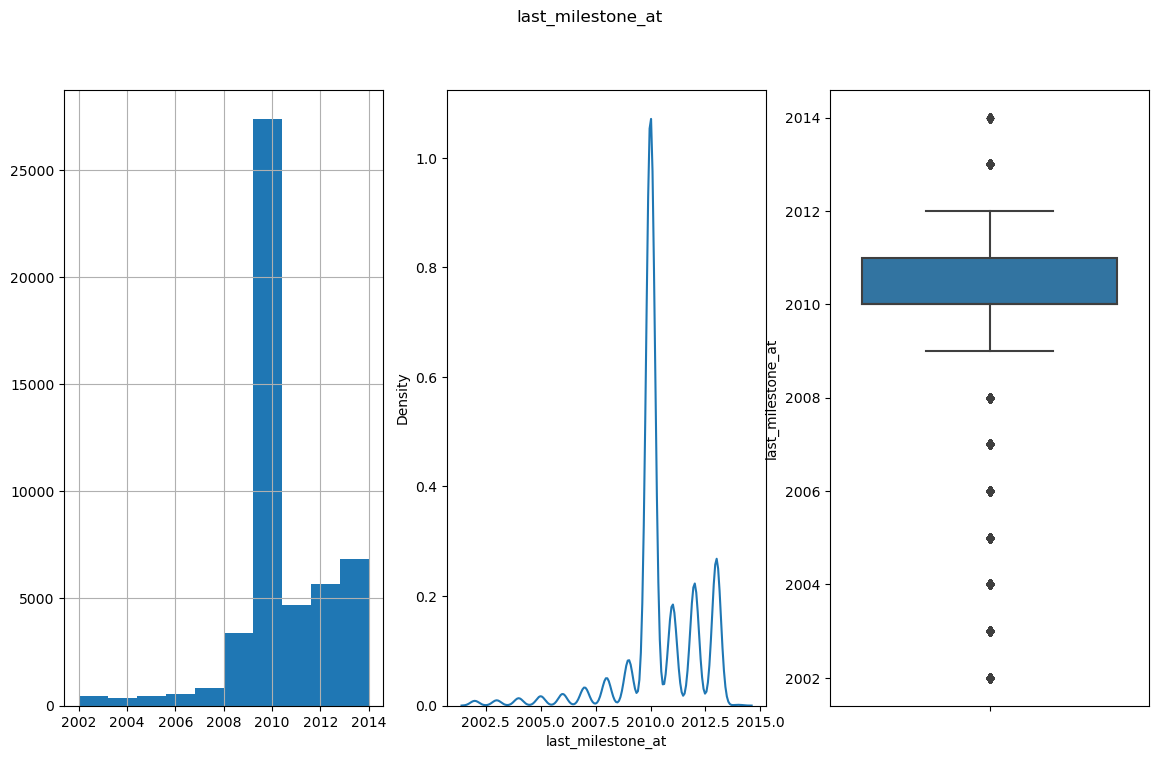

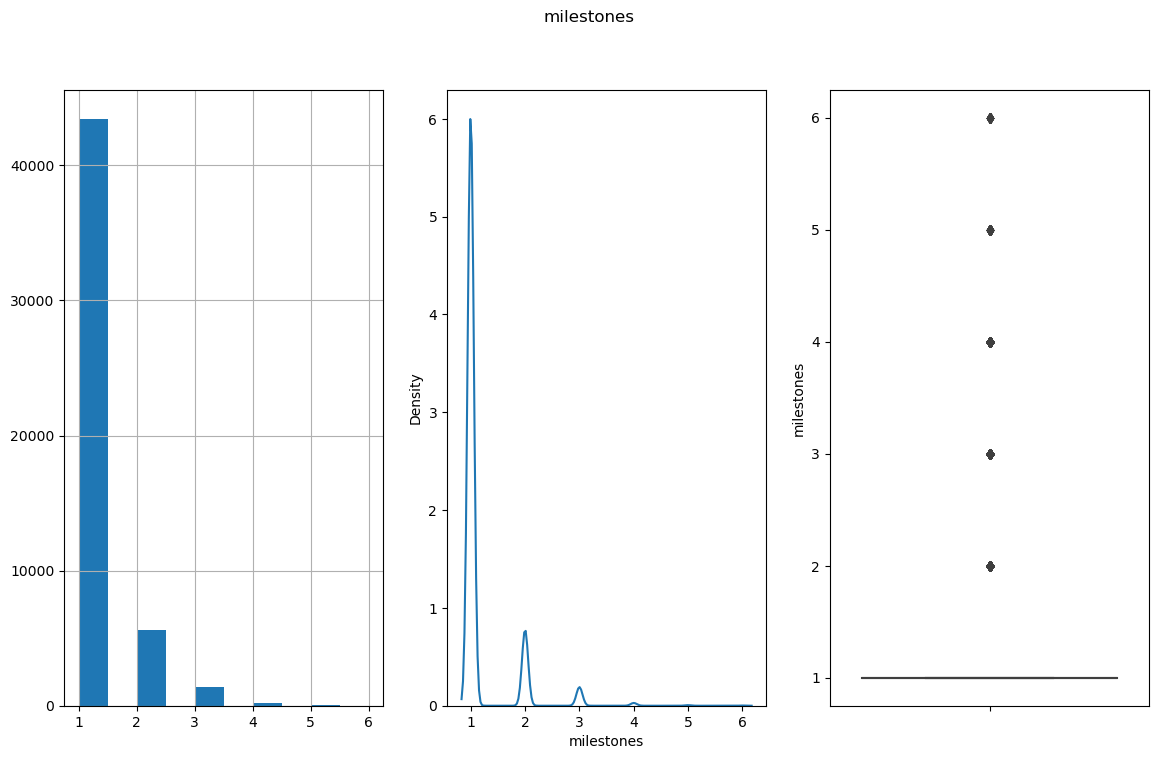

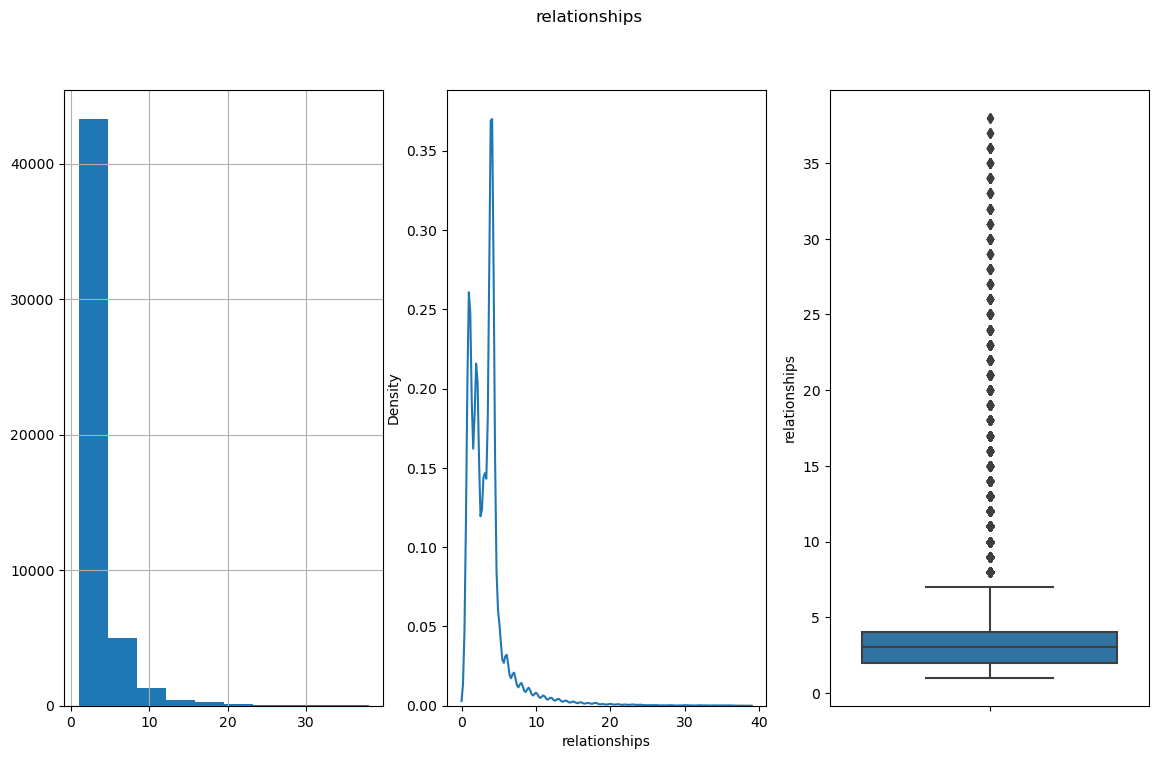

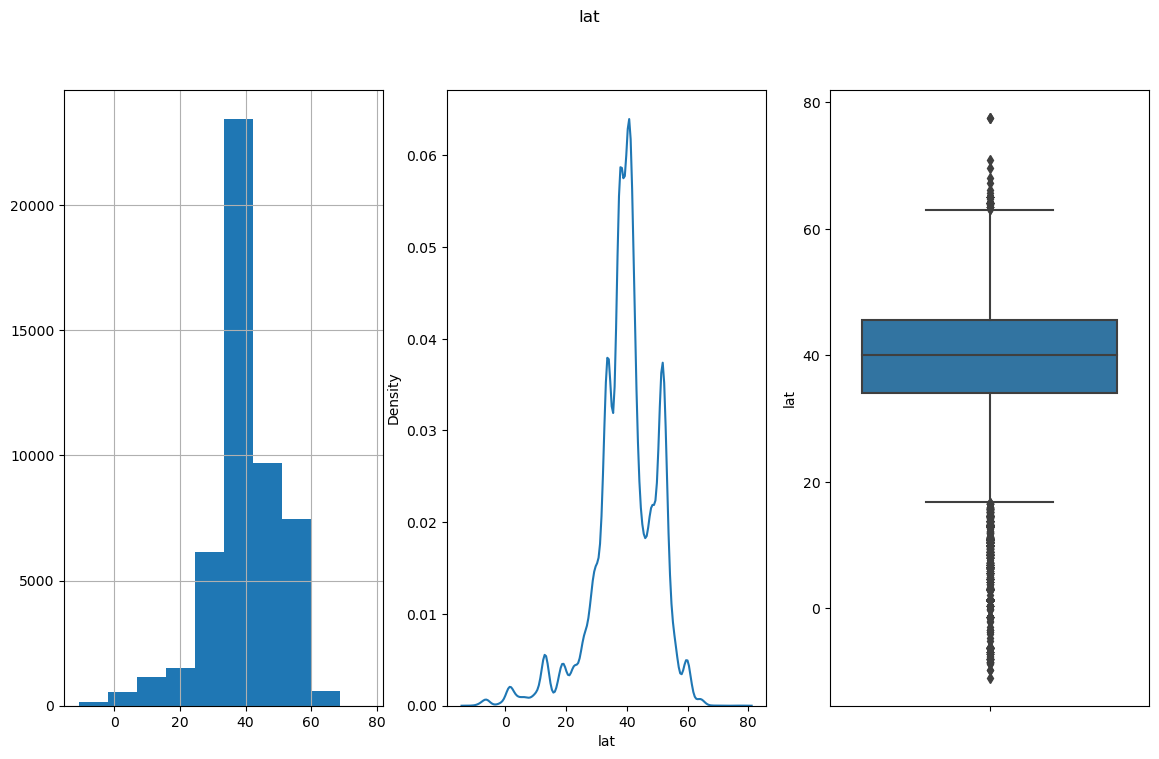

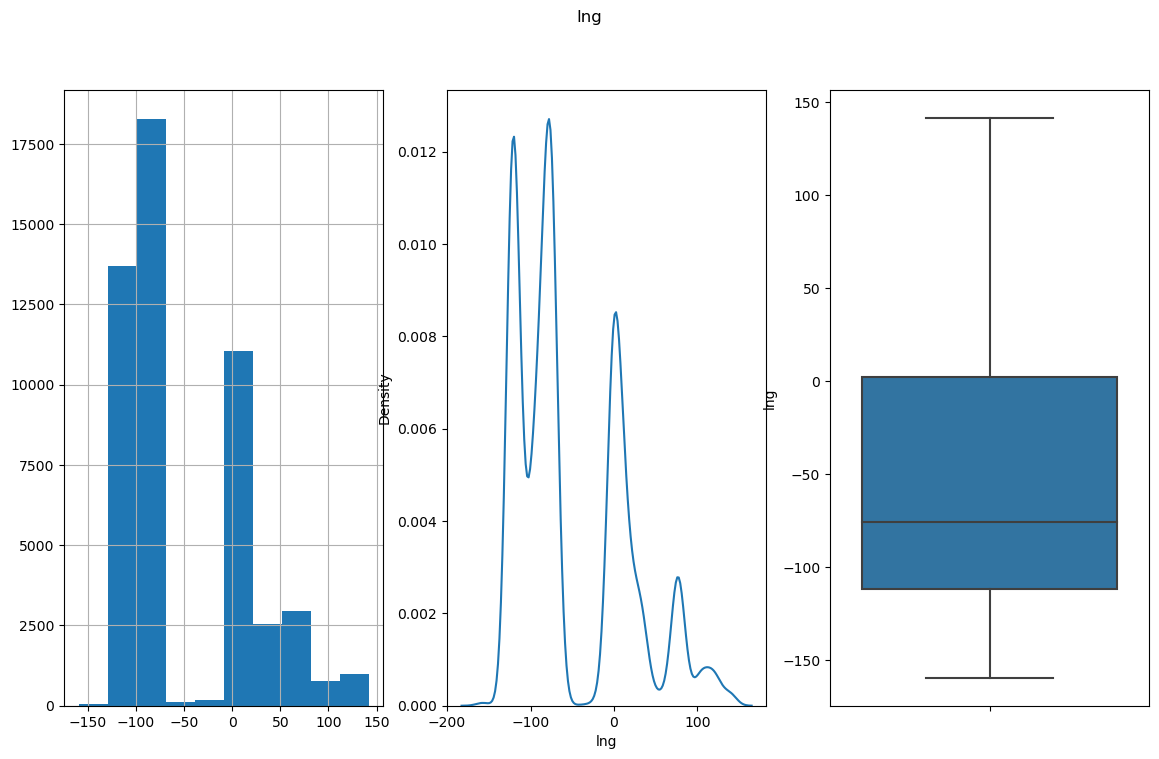

In [14]:
# Displaying histogram, kernel density plot and boxplot for each numerical feature

for col in num_feat:
    plt.figure(figsize = (14,8))
    plt.suptitle(col)
    plt.subplot(1,3,1)
    df_company[col].hist()
    plt.subplot(1,3,2)
    sns.kdeplot(df_company[col])
    plt.subplot(1,3,3)
    sns.boxplot(y = col, data = df_company)

#### 1) b) Univariate analysis/Categorical features

#### Category code

In [15]:
counts_code = df_company[cat_feat["category_code"]].sum()
counts_code

category_code_advertising          3116.0
category_code_biotech              1612.0
category_code_consulting           2403.0
category_code_ecommerce            4152.0
category_code_enterprise           2075.0
category_code_games_video          2372.0
category_code_mobile               3223.0
category_code_other               14676.0
category_code_public_relations     1218.0
category_code_software             9111.0
category_code_web                  6681.0
dtype: float64

<Axes: >

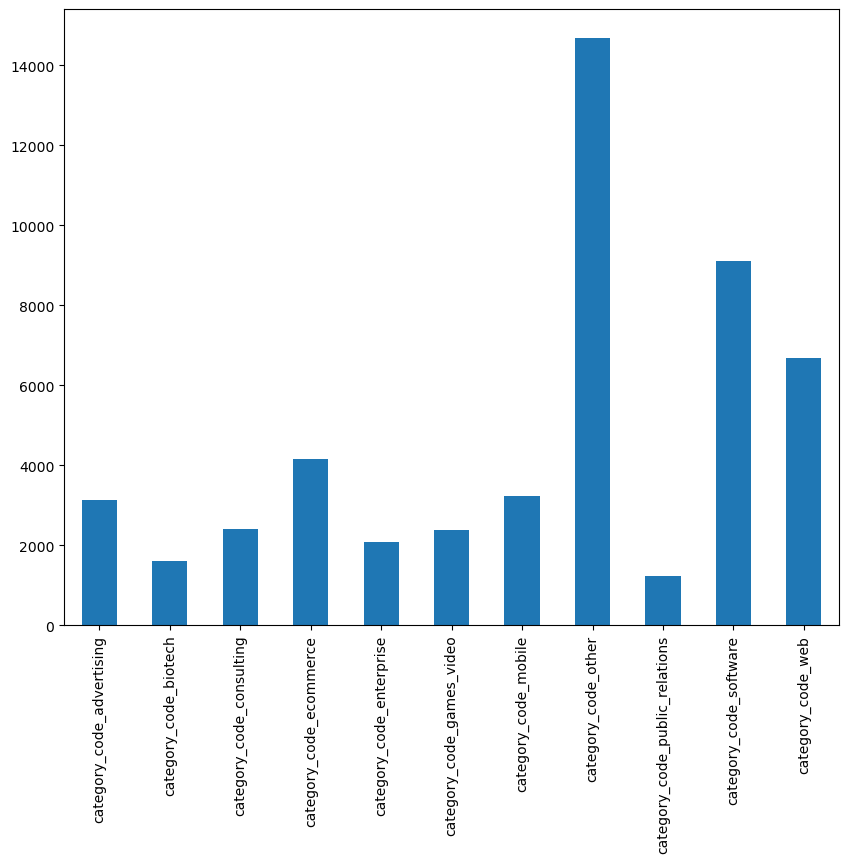

In [16]:
plt.figure(figsize = (10,8))
counts_code.plot(kind ="bar")

<Axes: >

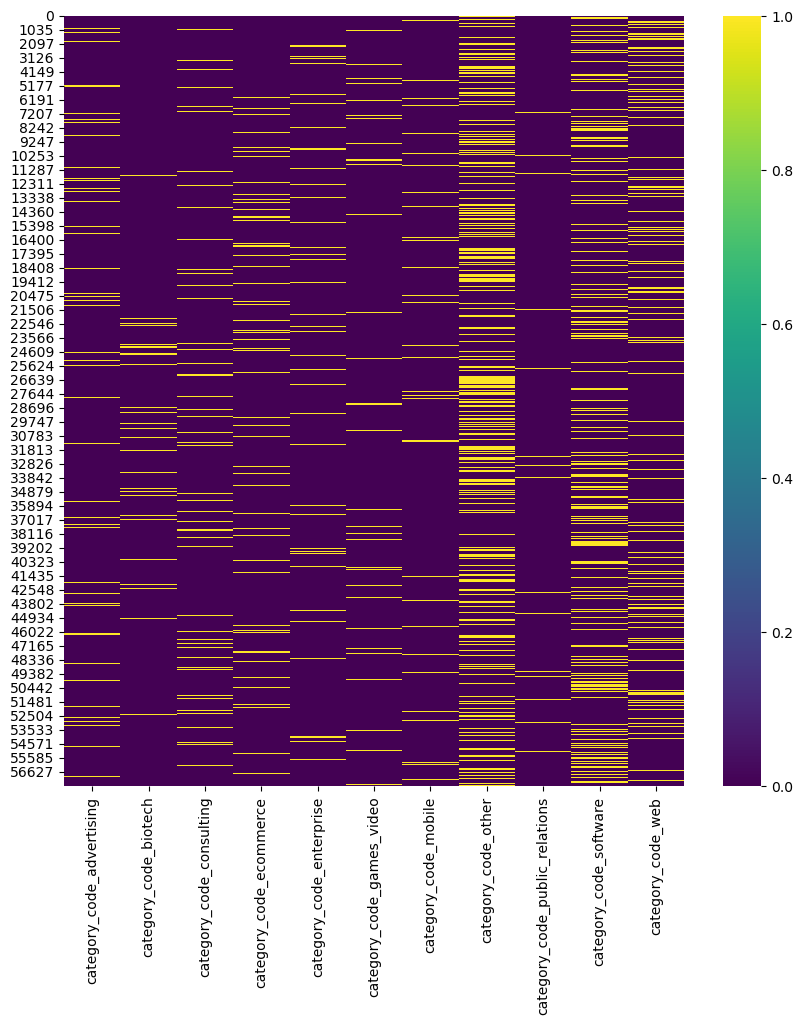

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(df_company[cat_feat["category_code"]], cmap='viridis', cbar=True)

#### Country code

In [19]:
counts_country = df_company[cat_feat["country_code"]].sum()
counts_country

country_code_AUS        117.0
country_code_CAN       2325.0
country_code_DEU       1219.0
country_code_ESP        801.0
country_code_FRA       1059.0
country_code_GBR       4357.0
country_code_IND       2747.0
country_code_ISR        616.0
country_code_NLD        588.0
country_code_USA      29217.0
country_code_other     7593.0
dtype: float64

<Axes: >

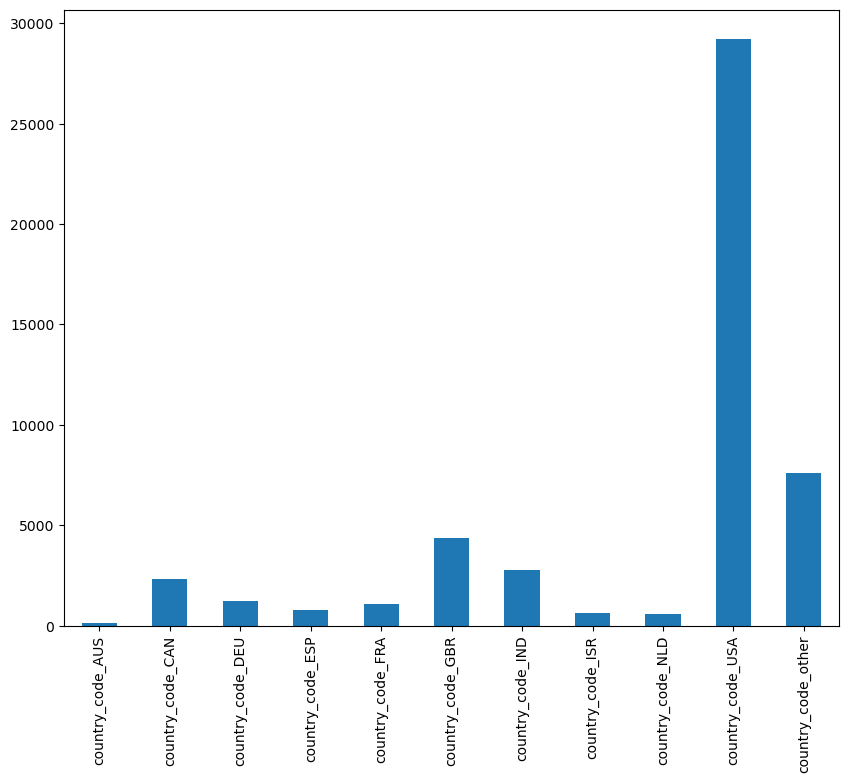

In [20]:
plt.figure(figsize = (10,8))
counts_country.plot(kind ="bar")

<Axes: >

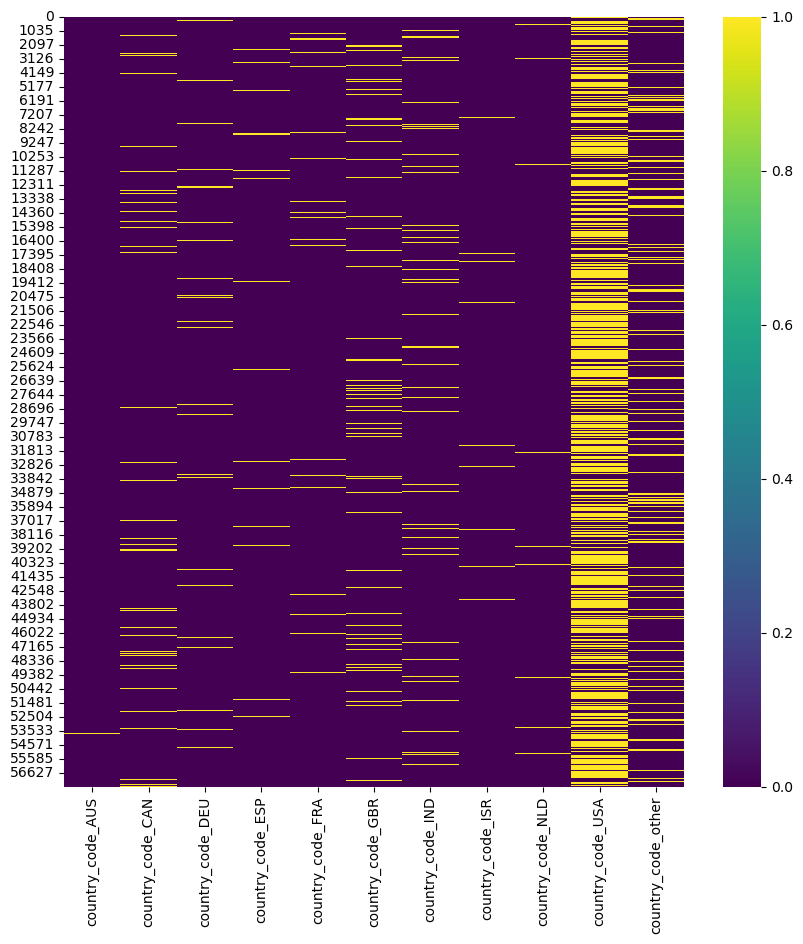

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(df_company[cat_feat["country_code"]], cmap='viridis', cbar=True)

#### IsClosed

In [25]:
df_company.isClosed.value_counts()

isClosed
0    46946
1     3693
Name: count, dtype: int64

<Axes: xlabel='isClosed'>

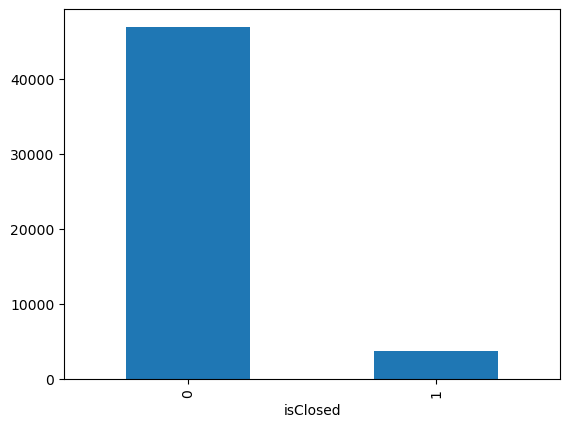

In [26]:
df_company.isClosed.value_counts().plot(kind = 'bar')

#### 2) a) Bivariate analysis/Numerical - Numerical relationships

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x1000 with 0 Axes>

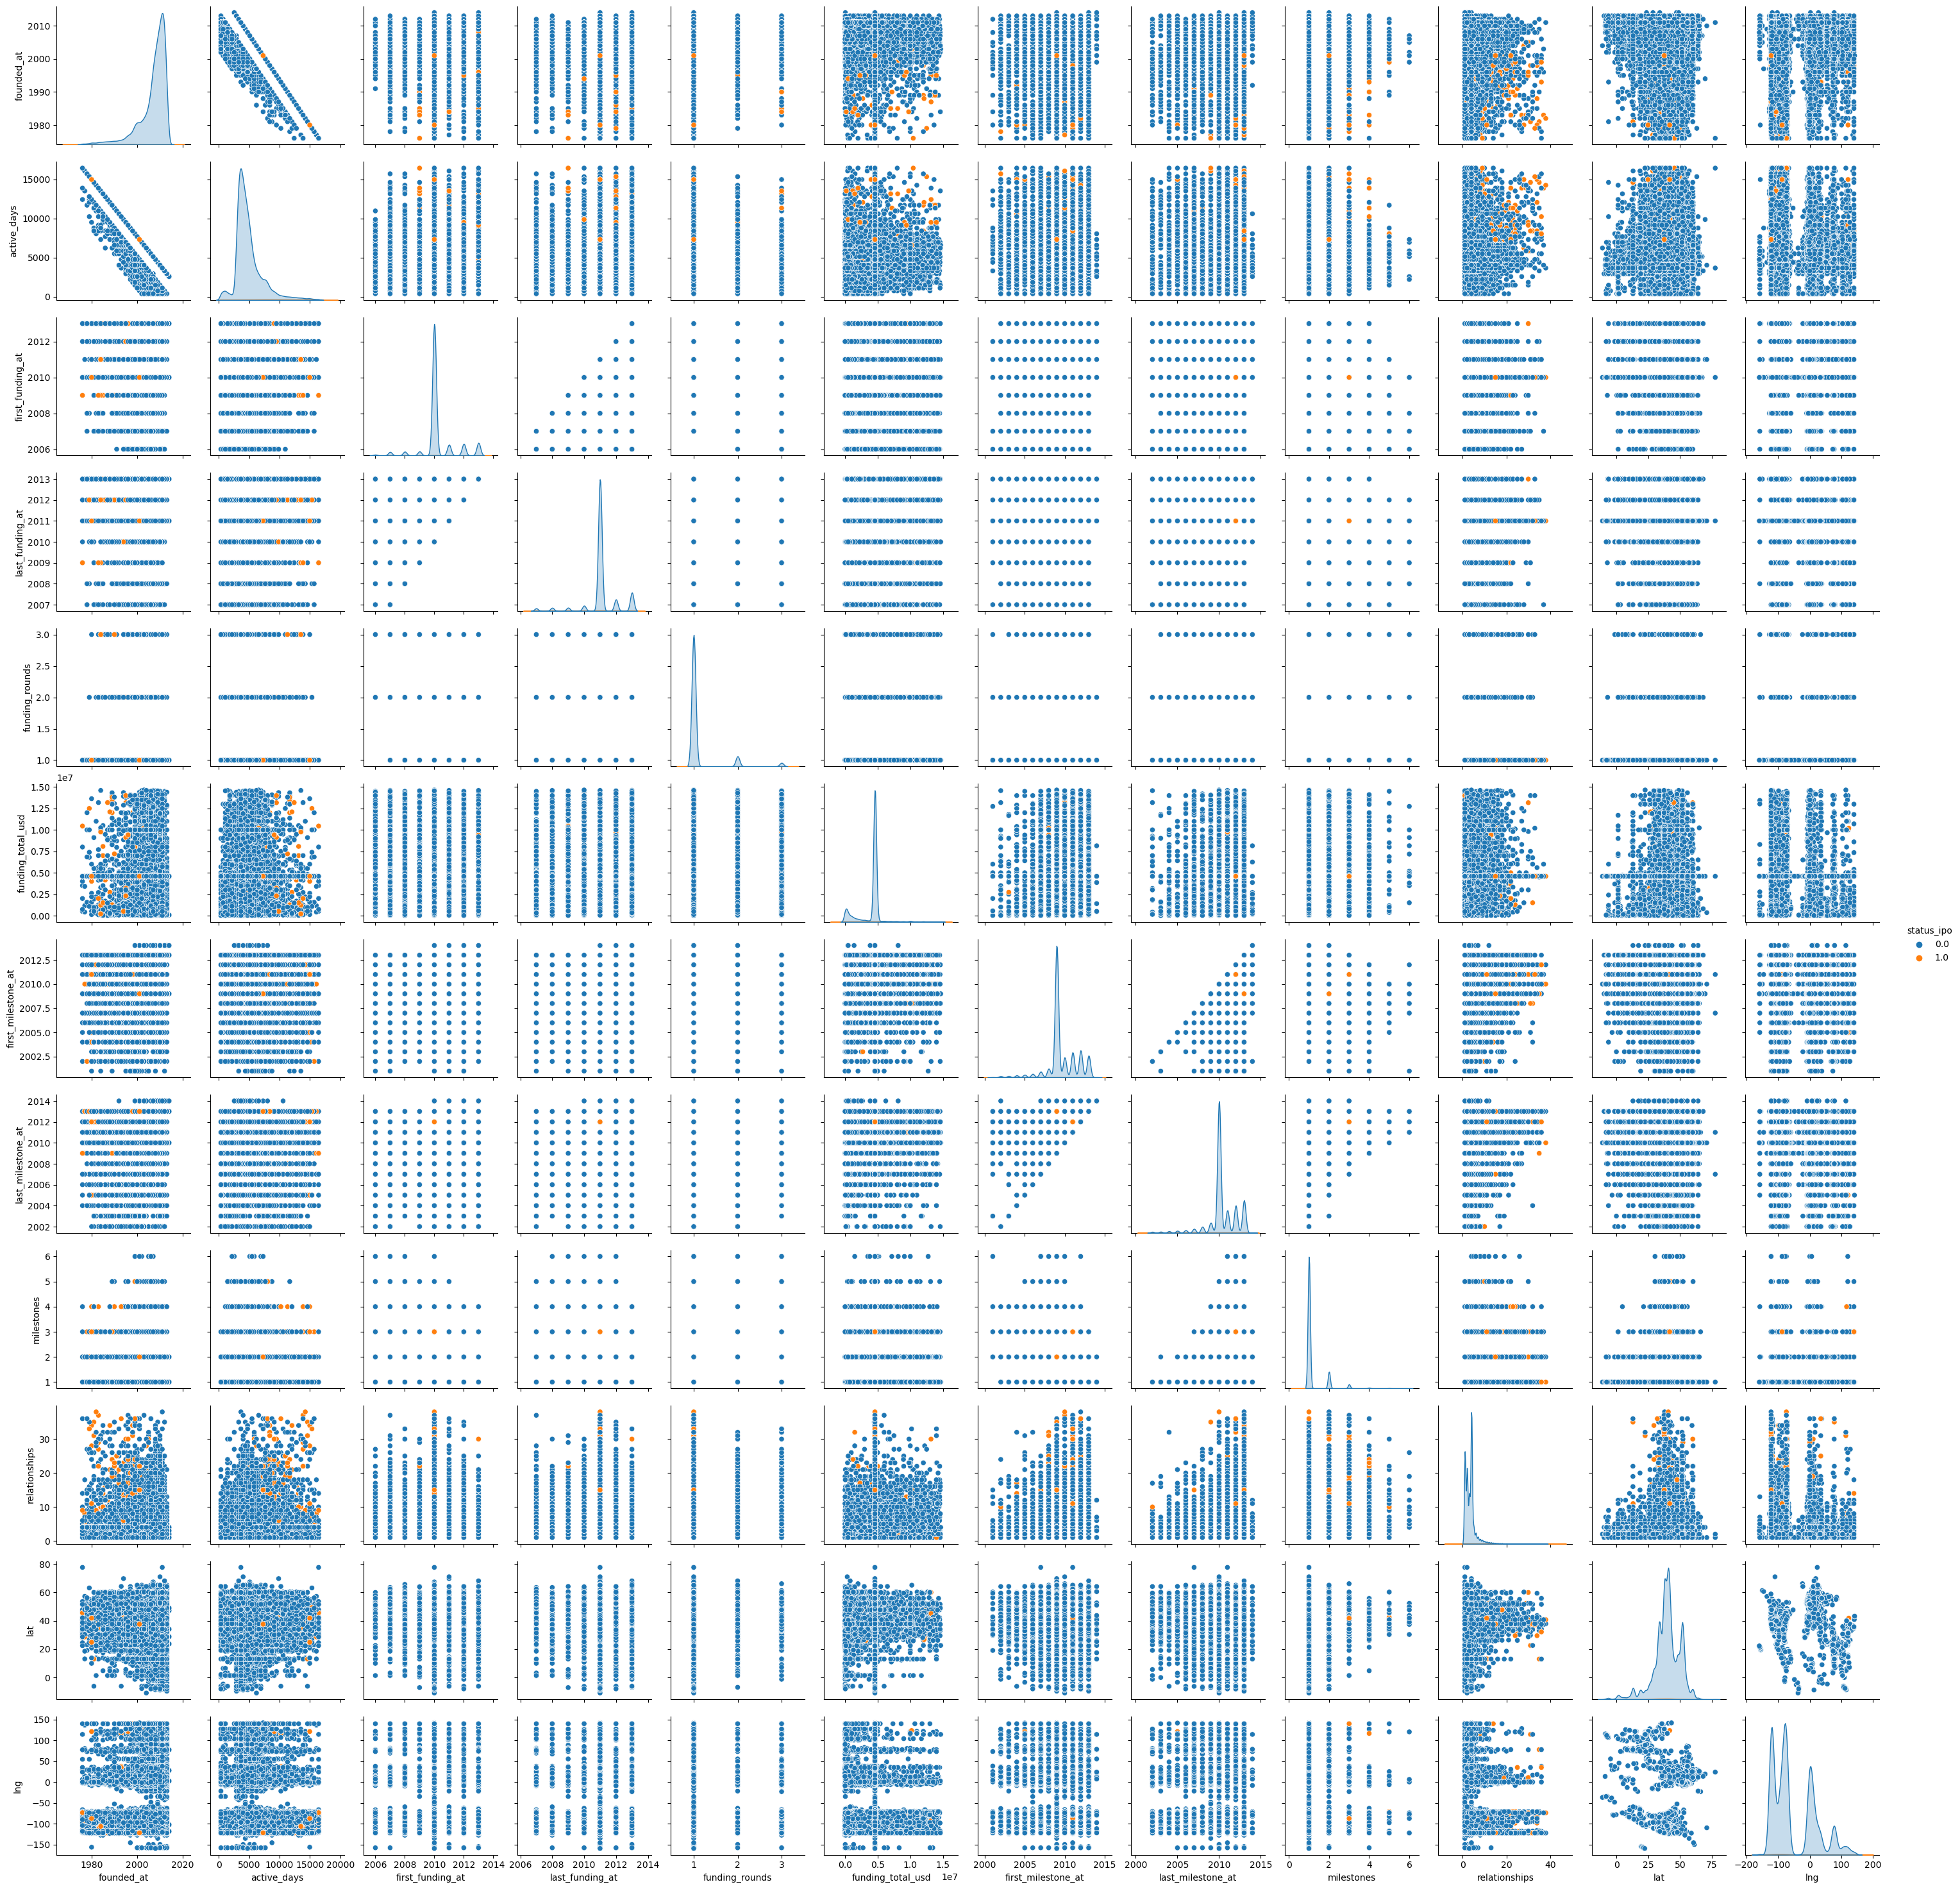

In [28]:
plt.figure(figsize = (12,10))
sns.pairplot(df_company[num_feat+["status_ipo"]], hue = "status_ipo")